In [4]:
import pyfas as fa
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 120

# OLGA ppl files, examples and howto

For an tpl file the following methods are available:

* <b>filter_data</b> - return a filtered subset of trends
* <b>extract</b> - extract a single trend variable
* <b>to_excel</b> - dump all the data to an excel file

The usual workflow should be:

1. Load the correct tpl
2. Select the desired variable(s)
3. Extract the results or dump all the variables to an excel file
4. Post-process your data in Excel or in the notebook itself

## Ppl loading

To load a specific tpl file the correct path and filename have to be provided:

In [5]:
ppl_path = '../../pyfas/test/test_files/'
fname = 'FC1_rev01.ppl'
ppl = fa.Ppl(ppl_path+fname)

### Profile selection

As for tpl files, a ppl file may contain hundreds of profiles, in particular for complex networks. For this reason a filtering method is quite useful.  
The easiest way is to filter on all the profiles using patters, the command `ppl.filter_trends("PT")` filters all the pressure profiless (or better, all the profiles with "PT" in the description, if you have defined a temperature profile in the position "PTTOPSIDE", for example, this profile will be selected too).
The resulting python dictionaly will have a unique index for each filtered profile that can be used to identify the interesting profile(s).
In case of an emply pattern all the available profiles will be reported.

In [6]:
ppl.filter_data('PT')

{4: "PT 'SECTION:' 'BRANCH:' 'old_offshore' '(PA)' 'Pressure'\n",
 12: "PT 'SECTION:' 'BRANCH:' 'riser' '(PA)' 'Pressure'\n",
 20: "PT 'SECTION:' 'BRANCH:' 'new_offshore' '(PA)' 'Pressure'\n",
 28: "PT 'SECTION:' 'BRANCH:' 'to_vent' '(PA)' 'Pressure'\n",
 36: "PT 'SECTION:' 'BRANCH:' 'dry' '(PA)' 'Pressure'\n",
 44: "PT 'SECTION:' 'BRANCH:' 'tiein_spool' '(PA)' 'Pressure'\n"}

The same outpout can be reported as a pandas dataframe:

In [7]:
pd.DataFrame(ppl.filter_data('PT'), index=("Profiles",)).T

,Profiles
4,PT 'SECTION:' 'BRANCH:' 'old_offshore' '(PA)' 'Pressure'\n
12,PT 'SECTION:' 'BRANCH:' 'riser' '(PA)' 'Pressure'\n
20,PT 'SECTION:' 'BRANCH:' 'new_offshore' '(PA)' 'Pressure'\n
28,PT 'SECTION:' 'BRANCH:' 'to_vent' '(PA)' 'Pressure'\n
36,PT 'SECTION:' 'BRANCH:' 'dry' '(PA)' 'Pressure'\n
44,PT 'SECTION:' 'BRANCH:' 'tiein_spool' '(PA)' 'Pressure'\n


---

### Dump to excel

To dump all the variables in an excel file use `ppl.to_excel()`
If no path is provided an excel file with the same name of the tpl file is generated in the working folder. Depending on the tpl size this may take a while.

### Extract a specific variable

Once you know the variable(s) index you are interested in (see the filtering paragraph above for more info) you can extract it (or them) and use the data directly in python.

Let's assume you are interested in the pressure and the temperature profile of the branch `riser`:

In [8]:
pd.DataFrame(ppl.filter_data("TM"), index=("Profiles",)).T

,Profiles
5,TM 'SECTION:' 'BRANCH:' 'old_offshore' '(C)' 'Fluid temperature'\n
13,TM 'SECTION:' 'BRANCH:' 'riser' '(C)' 'Fluid temperature'\n
21,TM 'SECTION:' 'BRANCH:' 'new_offshore' '(C)' 'Fluid temperature'\n
29,TM 'SECTION:' 'BRANCH:' 'to_vent' '(C)' 'Fluid temperature'\n
37,TM 'SECTION:' 'BRANCH:' 'dry' '(C)' 'Fluid temperature'\n
45,TM 'SECTION:' 'BRANCH:' 'tiein_spool' '(C)' 'Fluid temperature'\n


In [9]:
pd.DataFrame(ppl.filter_data("PT"), index=("Profiles",)).T

,Profiles
4,PT 'SECTION:' 'BRANCH:' 'old_offshore' '(PA)' 'Pressure'\n
12,PT 'SECTION:' 'BRANCH:' 'riser' '(PA)' 'Pressure'\n
20,PT 'SECTION:' 'BRANCH:' 'new_offshore' '(PA)' 'Pressure'\n
28,PT 'SECTION:' 'BRANCH:' 'to_vent' '(PA)' 'Pressure'\n
36,PT 'SECTION:' 'BRANCH:' 'dry' '(PA)' 'Pressure'\n
44,PT 'SECTION:' 'BRANCH:' 'tiein_spool' '(PA)' 'Pressure'\n


Our targets are:

<i>variable 13</i> for the temperature

and  

<i>variable 12</i> for the pressure

Now we can proceed with the data extraction:

In [10]:
ppl.extract(13)
ppl.extract(12)

The ppl object now has the two profiles available in the `data` attribute:

In [11]:
ppl.data.keys()

dict_keys([12, 13])

while the *label* attibute stores the variable type:

In [12]:
ppl.label[13]

"TM 'SECTION:' 'BRANCH:' 'riser' '(C)' 'Fluid temperature'"

### Ppl data structure

The ppl data structure at the moment contains:

* the geometry profile of the branch as `ppl.data[variable_index][0]`
* the selected profile at the timestep 0 as `ppl.data[variable_index][1][0]`
* the selected profile at the last timestep as `ppl.data[variable_index][1][-1]`

In other words the first index is the variable, the second is 0 for the geometry and 1 for the data, the last one identifies the timestep.

### Data processing

The results available in the data attribute are numpy arrays and can be easily manipulated and plotted:

In [13]:
%matplotlib inline

geometry = ppl.data[12][0]
pt_riser = ppl.data[12][1]
tm_riser = ppl.data[13][1]

def ppl_plot(geo, v0, v1, ts):
    fig, ax0 = plt.subplots(figsize=(12, 7));
    ax0.grid(True)
    p0, = ax0.plot(geo, v0[ts])
    ax0.set_ylabel("[C]", fontsize=16)
    ax0.set_xlabel("[m]", fontsize=16)
    ax1 = ax0.twinx()
    p1, = ax1.plot(geo, v1[ts]/1e5, 'r')
    ax1.grid(False)
    ax1.set_ylabel("[bara]", fontsize=16)
    ax1.tick_params(axis="both", labelsize=16)
    ax1.tick_params(axis="both", labelsize=16)
    plt.legend((p0, p1), ("Temperature profile", "Pressure profile"), loc=3, fontsize=16)
    plt.title("P and T for case FC1", size=20);

To plot the last timestep:

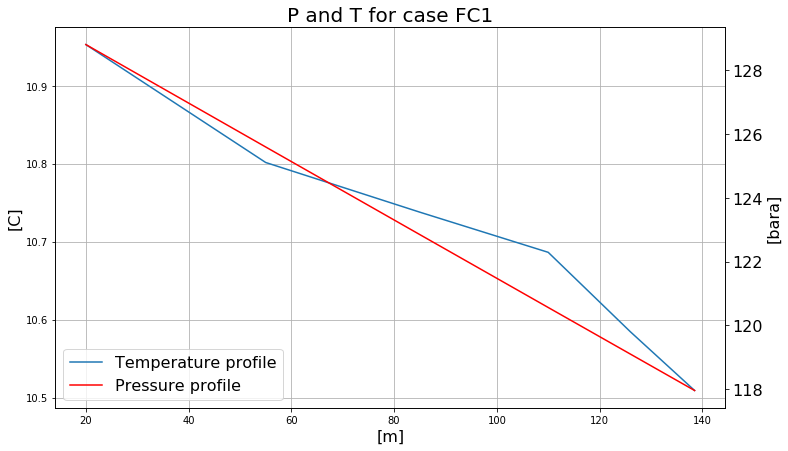

In [14]:
ppl_plot(geometry, tm_riser, pt_riser, -1)

The time can also be used as parameter:

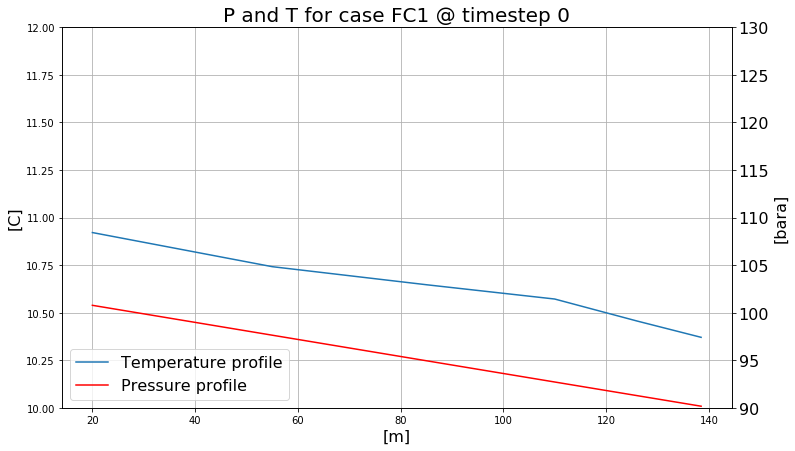

In [15]:
import ipywidgets.widgets as widgets
from ipywidgets import interact

timesteps=len(tm_riser)-1 

@interact
def ppl_plot(ts=widgets.IntSlider(min=0, max=timesteps)):
    fig, ax0 = plt.subplots(figsize=(12, 7));
    ax0.grid(True)
    p0, = ax0.plot(geometry, tm_riser[ts])
    ax0.set_ylabel("[C]", fontsize=16)
    ax0.set_xlabel("[m]", fontsize=16)
    ax0.set_ylim(10, 12)
    ax1 = ax0.twinx()
    ax1.set_ylim(90, 130)
    p1, = ax1.plot(geometry, pt_riser[ts]/1e5, 'r')
    ax1.grid(False)
    ax1.set_ylabel("[bara]", fontsize=16)
    ax1.tick_params(axis="both", labelsize=16)
    ax1.tick_params(axis="both", labelsize=16)
    plt.legend((p0, p1), ("Temperature profile", "Pressure profile"), loc=3, fontsize=16)
    plt.title("P and T for case FC1 @ timestep {}".format(ts), size=20);

<i>The above plot has an interactive widget if executed</i>

### Advanced data processing

An example of advanced data processing for Python enthusiasts and professional flow assurance.
Script below extracts variable profiles along given branches at given time steps. Usage instructions:
- Consecutive branches are joined together and extracted profiles are written into a CSV file.
- For unit conversion multiplication factors for every variable can be given.
- Global variables can be redefined before every call of main(), which allows for multiple extractions in a single script run. No need to modify the functions, unless you know what you are doing.
- Only few global variables and lists have to be defined, see below main(), there is no need to edit the functions.
- The script does not perform error checks, make sure that all variables, branches and times (time steps) are present in the simulation file.

In [ ]:
import os
import sys
import time
import pyfas as fa


def getVarsInds(ppl, emptyLst):

	for _, var in enumerate(allVar):
	
		lst = []
	
		# dictionary of the following kind:
		# {4: "PT 'SECTION:' 'BRANCH:' 'old_offshore' '(PA)' 'Pressure'\n",
		#  12: "PT 'SECTION:' 'BRANCH:' 'riser' '(PA)' 'Pressure'\n"}
		myDic = ppl.filter_data(var)
	
		for _, pos in enumerate(allPos):

			for _, (k, v) in enumerate(myDic.items()):
			
				lstStr  = v.split("' '")
				lstStr1 = v.split(" ")
				
				if lstStr1[0] == var and lstStr[2] == pos: # my var and branch
				
					lst.append( int(k) )
					break
		
		emptyLst.append(lst)


def getData(ppl, pplFileName, fullLst):

	filterTimesLstLoc = filterTimesLst
	if filterTime and (not filterTimesLstLoc):
		filterTimesLstLoc = [round( ppl.time[myTS-1] / 3600.0, 3 ) for myTS in filterTimesInd]
	
	for i, _ in enumerate(allVar):
		for j, _ in enumerate(allPos): ppl.extract( fullLst[i][j] )
	
	fout = open("{0}.csv".format(pplFileName), 'w')
	
	# write header
	outLine = ""
	for i, _ in enumerate(allVar):
		for ts in range( len(ppl.time) ):
			outStr = "Pipe L [km],{0},".format( allNam[i] )
			if filterTime:
				if round(ppl.time[ts] / 3600.0, 3) in filterTimesLstLoc: outLine += outStr
			else: outLine += outStr
	fout.write("{0}\n".format(outLine))
	
	outLine = ""
	for i, _ in enumerate(allVar):
		for ts in range( len(ppl.time) ):
			outStr = "Time [hr],{0},".format( float(ppl.time[ts]) / 3600.0 )
			if filterTime:
				if round(ppl.time[ts] / 3600.0, 3) in filterTimesLstLoc: outLine += outStr
			else: outLine += outStr
	fout.write("{0}\n".format(outLine))
	
	# write profiles
	lastGeomPoint = 0.0
	for j, _ in enumerate(allPos):
		
		geomPrfl = ppl.data[ fullLst[0][j] ][ 0 ] + lastGeomPoint # geometry profile
		
		for p in range( len( ppl.data[ fullLst[0][j] ][ 1 ][ 0 ] ) ): # for p in range( len(geomPrfl) ): # loop over profile points
			
			outLine = ""
			
			for i, _ in enumerate(allVar):
				
				for ts in range( len(ppl.time) ): # loop over timesteps
					
					varPrfl  = ppl.data[ fullLst[i][j] ][ 1 ][ ts ] # var profile at the timestep ts
					
					outStr = "{0},{1},".format( float(geomPrfl[p]) / 1000.0, float(varPrfl[p]) * allMul[i] )
					
					if filterTime:
						if round(ppl.time[ts] / 3600.0, 3) in filterTimesLstLoc: outLine += outStr
					else:
						outLine += outStr
				
			fout.write("{0}\n".format(outLine))
		
		if doSpecialGeomJoin:
			lastGeomPoint = geomPrfl[0] - lastGeomPoint + geomPrfl[-1] # check it for the genral case with more than two sections!!!
		else:
			lastGeomPoint = geomPrfl[-1]
	
	fout.close()


def main():

	print( "{0} initialization".format(time.strftime("%H:%M:%S", time.localtime())) )
	fname = myPPLFile
	ppl = fa.Ppl(fname)
	
	varIndLst = [] # separate list for every var in order (all postions/branches for every var)
	getVarsInds(ppl, varIndLst)
	
	print( "{0} extraction".format(time.strftime("%H:%M:%S", time.localtime())) )
	
	getData(ppl, fname, varIndLst)
	
	print( "{0} done".format(time.strftime("%H:%M:%S", time.localtime())) )


# global variables
allMul = [1.0, 1.0e-5, 1.0]
allVar = ["TM", "PT", "ROF"]
allNam = ["Temperature, degC", "Pressure, bara", "Mixture Density, kg/m3"]

doSpecialGeomJoin = False

myPPLFile = "OLGA_Simulation.ppl"

filterTime = True
filterTimesLst = [] # as an option (if the list is not empty), time in hours rounded to three decimal points


# extract data (i)
filterTimesInd = [1, 2, 3, 4, 5, 10, 50, 100] # the first time step is one (not zero!)
allPos = ["E_RISER", "E_FLOWLINE"]
main()
os.rename( "{0}.csv".format(myPPLFile), "{0}_East.csv".format(myPPLFile) )

# extract data (ii)
filterTimesInd = [1, 2, 3, 4, 5, 10, 50, 100] # the first time step is one (not zero!)
allPos = ["W_RISER", "W_FLOWLINE"]
main()
os.rename( "{0}.csv".format(myPPLFile), "{0}_West.csv".format(myPPLFile) )